<a href="https://colab.research.google.com/github/sharmaine-zvikonyo/NLP-store-reviews/blob/main/NLP_store_reviews_DS_%26_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading & Set Up**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/mcdonalds-store-reviews")

print("Path to dataset files:", path)

100%|██████████| 1.78M/1.78M [00:00<00:00, 169MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/mcdonalds-store-reviews/versions/1


In [ ]:
import os
file_list = os.listdir(path)
print(file_list)

['McDonald_s_Reviews.csv']


In [ ]:
import pandas as pd
import os

file_name = 'McDonald_s_Reviews.csv'

full_file_path = os.path.join(path, file_name)

# Try reading with a different encoding
df = pd.read_csv(full_file_path, encoding='latin1')

print(df.head())

   reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                         

# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,reviewer_id,latitude,longitude
count,33396.000000,32736.000000,32736.000000
mean,16698.500000,34.442546,-90.647033
std,9640.739131,5.344116,16.594844
min,1.000000,25.790295,-121.995421
25%,8349.750000,28.655350,-97.792874
50%,16698.500000,33.931261,-81.471414
75%,25047.250000,40.727401,-75.399919
max,33396.000000,44.981410,-73.459820


In [ ]:
df['rating'].value_counts()

,count
rating,
5 stars,10274
1 star,9431
4 stars,5787
3 stars,4818
2 stars,3086


In [ ]:
print(df['review'].iloc[50:55])

50    I went to this location tonight to see if they...
51    Rude customer service, unprofessional attitude...
52    Representative was very rude and disrespectful...
53    They got our order correct and didn't cut me o...
54    Good quick drive through service.  Was a long ...
Name: review, dtype: object


In [ ]:
df.dropna(subset=['review'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [ ]:
import re

# Convert to lowercase
df['review'] = df['review'].str.lower()

# Remove punctuation, numbers, and special characters
df['cleaned_review'] = df['review'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

print(df[['review', 'cleaned_review']].head())

                                              review  \
0  why does it look like someone spit on my food?...   
1  it'd mcdonalds. it is what it is as far as the...   
2  made a mobile order got to the speaker and che...   
3  my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...   
4  i repeat my order 3 times in the drive thru, a...   

                                      cleaned_review  
0  why does it look like someone spit on my food\...  
1  itd mcdonalds it is what it is as far as the f...  
2  made a mobile order got to the speaker and che...  
3  my mc crispy chicken sandwich was  customer se...  
4  i repeat my order  times in the drive thru and...  


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line to download the missing resource


stop_words = set(stopwords.words('english'))

def tokenize_and_clean(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

df['processed_review'] = df['cleaned_review'].apply(tokenize_and_clean)
print(df[['cleaned_review', 'processed_review']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                      cleaned_review  \
0  why does it look like someone spit on my food\...   
1  itd mcdonalds it is what it is as far as the f...   
2  made a mobile order got to the speaker and che...   
3  my mc crispy chicken sandwich was  customer se...   
4  i repeat my order  times in the drive thru and...   

                                    processed_review  
0  look like someone spit food normal transaction...  
1  itd mcdonalds far food atmosphere go staff mak...  
2  made mobile order got speaker checked line mov...  
3  mc crispy chicken sandwich customer service qu...  
4  repeat order times drive thru still manage mes...  


In [ ]:
import pandas as pd
import os

# Check for and count duplicate rows
print("Number of duplicate rows:")
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for and count missing values per column
print("\nNumber of missing values per column:")
print(df.isnull().sum())

Number of duplicate rows:
0

Number of missing values per column:
reviewer_id           0
store_name            0
category              0
store_address         0
latitude            660
longitude           660
rating_count          0
review_time           0
review                0
rating                0
cleaned_review        0
processed_review      0
dtype: int64


# **Data Visualization**

/tmp/ipython-input-3610007137.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


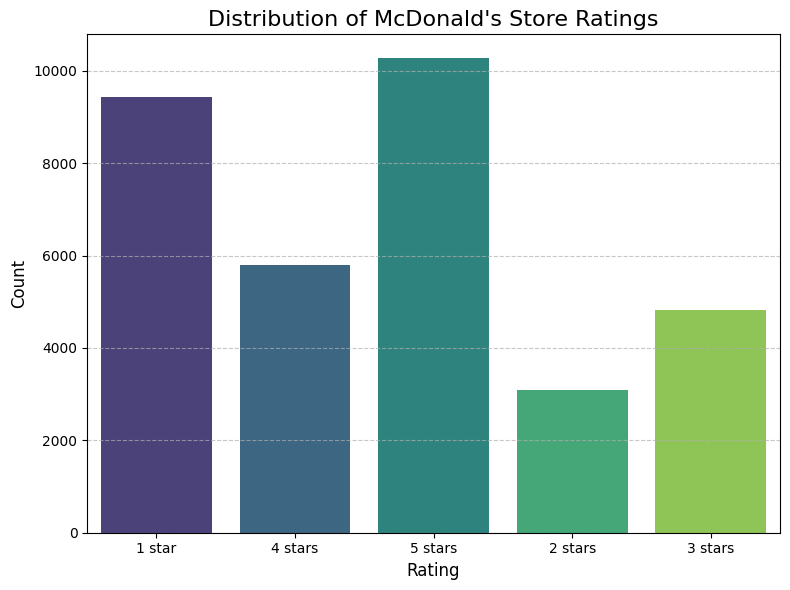

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the rating counts
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of McDonald\'s Store Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Machine Learning**

## Data split

In [ ]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df['rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (26716, 5000)
Shape of X_test: (6680, 5000)


## Train model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the 'processed_review' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_review'])

print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (33396, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

## Evaluate model

In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6531437125748503

Classification Report:
               precision    recall  f1-score   support

      1 star       0.69      0.89      0.78      1898
     2 stars       0.52      0.17      0.26       645
     3 stars       0.56      0.43      0.49       939
     4 stars       0.54      0.42      0.47      1146
     5 stars       0.70      0.81      0.75      2052

    accuracy                           0.65      6680
   macro avg       0.60      0.55      0.55      6680
weighted avg       0.63      0.65      0.63      6680



## Data Imbalance Fix

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Make and evaluate predictions again
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.6161676646706586

Classification Report:
               precision    recall  f1-score   support

      1 star       0.77      0.74      0.76      1898
     2 stars       0.32      0.45      0.37       645
     3 stars       0.46      0.50      0.48       939
     4 stars       0.49      0.51      0.50      1146
     5 stars       0.78      0.66      0.72      2052

    accuracy                           0.62      6680
   macro avg       0.57      0.57      0.57      6680
weighted avg       0.64      0.62      0.63      6680



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


X = df['processed_review']
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Train the model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)

#Evaluate the model
y_pred_rf = random_forest_model.predict(X_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.698502994011976

Random Forest Classification Report:
               precision    recall  f1-score   support

      1 star       0.68      0.93      0.79      1898
     2 stars       0.88      0.34      0.49       645
     3 stars       0.69      0.46      0.55       939
     4 stars       0.71      0.44      0.55      1146
     5 stars       0.70      0.86      0.77      2052

    accuracy                           0.70      6680
   macro avg       0.73      0.60      0.63      6680
weighted avg       0.71      0.70      0.68      6680



## Fine tune

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the grid search with your model
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5, # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1, # Use all available cores
    verbose=1
)

# Run the grid search
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.6848706713468067


Evaluate again

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Run the grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_final = best_model.predict(X_test_tfidf)

# Evaluate its performance
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nFinal Classification Report:\n", classification_report(y_test, y_pred_final))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Final Model Accuracy: 0.7007485029940119

Final Classification Report:
               precision    recall  f1-score   support

      1 star       0.68      0.93      0.79      1898
     2 stars       0.93      0.33      0.48       645
     3 stars       0.69      0.46      0.55       939
     4 stars       0.72      0.44      0.54      1146
     5 stars       0.70      0.86      0.77      2052

    accuracy                           0.70      6680
   macro avg       0.74      0.60      0.63      6680
weighted avg       0.72      0.70      0.68      6680



# **Feature Importance**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataframe
path = kagglehub.dataset_download("nelgiriyewithana/mcdonalds-store-reviews")
file_name = 'McDonald_s_Reviews.csv'
full_file_path = os.path.join(path, file_name)
df = pd.read_csv(full_file_path, encoding='latin1')

# Clean the dataframe (including text processing)
df.dropna(subset=['review'], inplace=True)
df['review'] = df['review'].str.lower()
import re
df['cleaned_review'] = df['review'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Download the missing resource
stop_words = set(stopwords.words('english'))
def tokenize_and_clean(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)
df['processed_review'] = df['cleaned_review'].apply(tokenize_and_clean)

# Split data and vectorize
X = df['processed_review']
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Get the best model from grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_tfidf, y_train)
best_model = grid_search.best_estimator_

# Get the feature names from your TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame to link words to their importance scores
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Display the bottom 10 (least important) features for contrast
print("\nBottom 10 Least Important Features:")
print(feature_importance_df.tail(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Top 10 Most Important Features:
        feature  importance
1852       good    0.051784
1465  excellent    0.051271
2860    neutral    0.040314
3263       poor    0.018625
4371   terrible    0.017030
1876      great    0.013369
4943      worst    0.012112
1557       fast    0.009484
1680       food    0.008763
3693       rude    0.008668

Bottom 10 Least Important Features:
           feature  importance
1068       danisha         0.0
1340           edc         0.0
2665     mechanism         0.0
4645  undertrained         0.0
2730          mike         0.0
1112     defensive         0.0
1462       examine         0.0
635   catastrophic         0.0
647             cb         0.0
497            bri         0.0


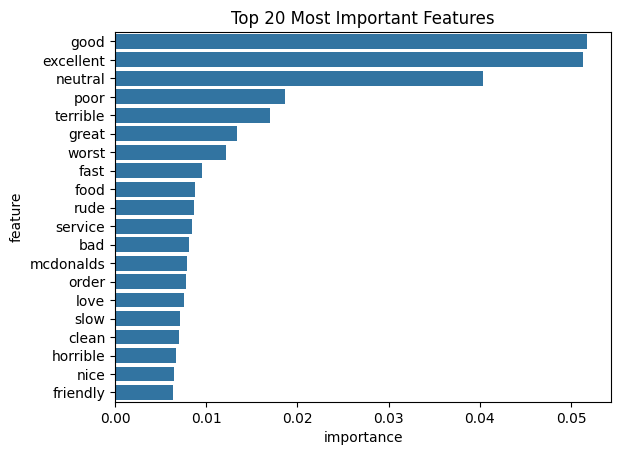

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Most Important Features')
plt.show()

# **Conclusion**

​Reinforce What Works: Continue to maintain high standards for food quality and staff friendliness. Perhaps implement a system to recognize employees who consistently receive positive feedback.

​Investigate Inconsistencies: The presence of both positive and negative words related to service and food indicates a lack of consistency. The store manager should investigate why some experiences are positive while others are not. This could involve looking at factors like peak hours, staff shortages, or training gaps.

​Address the Core Issues: The top negative words are a direct signal to address the root cause of these "terrible" and "horrible" experiences. This could mean improving quality control, resolving common complaints, or providing more detailed feedback to staff.